In [4]:
import numpy as np
import matplotlib.pyplot as plt
import typing as T

A = np.random.rand(4, 4)
b = np.random.rand(4, 1)
x = np.linalg.solve(A, b)
A @ x - b


array([[-1.11022302e-16],
       [-2.22044605e-16],
       [-2.22044605e-16],
       [-7.77156117e-16]])

In [5]:
x

array([[-1.99721191],
       [-1.55349094],
       [ 2.73893071],
       [ 4.16422345]])

In [6]:
# 4x1 + 3x2 = 10
# 7x1 + x2 = 14
A = np.array([[4.1, 3*np.pi], [7, 1]])
b = np.array([[12], [14]])
print(A, "\n", b)
x = np.linalg.solve(A, b)
A @ x
x

[[4.1        9.42477796]
 [7.         1.        ]] 
 [[12]
 [14]]


array([[1.93858432],
       [0.42990979]])

In [7]:
def make_vandermonde(x):
    N = len(x)
    A = np.ones([N, 3])  # Make a matrix with N number of rows and 3 columns
    A[:,1] = x  # Second column is coefficients of x
    A[:,2] = x ** 2
    return A

In [8]:
# a0 * 1 + a1 * x + a2 * x^2 = y
N = 100
# x, y = np.random.rand(N), np.random.rand(N)
x = np.random.rand(N)  # Number of random values generated between 0-1
y = 14 + (9 * x) + (76 * x**2) + np.random.randn(N) * 0.01  # quadratic equation with added noise
A = make_vandermonde(x)
# a = np.linalg.solve(A, y)
a = np.linalg.pinv(A) @ y
np.linalg.norm(A @ a - y) / N
A

array([[1.00000000e+00, 3.88690658e-01, 1.51080427e-01],
       [1.00000000e+00, 4.30003704e-01, 1.84903185e-01],
       [1.00000000e+00, 3.74273928e-02, 1.40080974e-03],
       [1.00000000e+00, 4.60178012e-01, 2.11763803e-01],
       [1.00000000e+00, 7.25841412e-01, 5.26845755e-01],
       [1.00000000e+00, 2.13579723e-01, 4.56162983e-02],
       [1.00000000e+00, 7.85997001e-01, 6.17791286e-01],
       [1.00000000e+00, 9.79780024e-01, 9.59968895e-01],
       [1.00000000e+00, 9.76417856e-01, 9.53391829e-01],
       [1.00000000e+00, 1.68874222e-01, 2.85185027e-02],
       [1.00000000e+00, 9.94961710e-01, 9.89948805e-01],
       [1.00000000e+00, 2.77442096e-01, 7.69741164e-02],
       [1.00000000e+00, 5.36153809e-02, 2.87460907e-03],
       [1.00000000e+00, 1.37912897e-01, 1.90199670e-02],
       [1.00000000e+00, 6.18679158e-01, 3.82763900e-01],
       [1.00000000e+00, 1.47939271e-01, 2.18860280e-02],
       [1.00000000e+00, 4.56993275e-01, 2.08842853e-01],
       [1.00000000e+00, 7.24596

In [9]:
def f(x: float, c: T.Iterable, noise: float = 1) -> float:
    return c[0] + (c[1] * x) + (c[2] * x**2) #+ np.random.randn(len(x)) * noise  # quadratic equation with added noise

-50.0
500


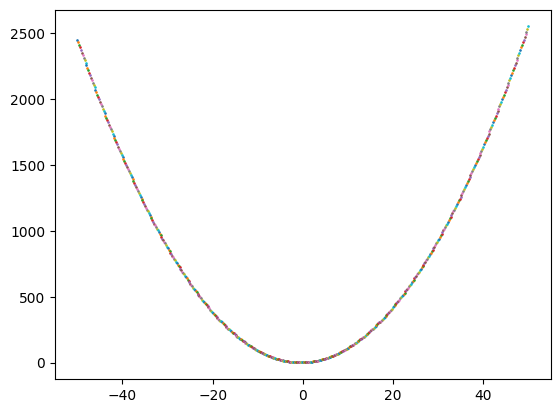

In [10]:
domain = np.linspace(-50, 50, 500)
fig, ax = plt.subplots()
print(domain[0])
print(len(domain))
for i in range(len(domain)):
    ax.scatter(domain[i], f(domain[i], (1, 1, 1), 50), s = 0.8)
# ax.set_ylim(0, 1000)
plt.show()

[1.13856729e-14 6.00000000e+00 1.20000000e+01]
[-2.57375493e-13  6.00000000e+00  1.20000000e+01]
[-2.46537074e-16  6.00000000e+00  1.20000000e+01]
[np.float64(4.198689634024801e-14), np.float64(4.315892958581927e-13), np.float64(2.450654810483665e-15)]
1.5867561566964145e-13


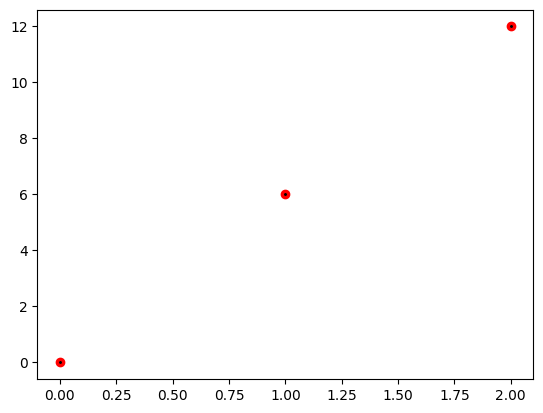

In [11]:
coeffs = (0, 6, 12)
xs = (0,1,2)
avg = []
N = 3
plt.scatter((0,1,2), coeffs, c = "r")
for i in range(3):  # each is an experiment
    diff = []  # coefficient error in this experiment
    x = np.random.rand(N)  # Number of random values generated between 0-1
    _y = f(x, coeffs, noise = 2)
    A = make_vandermonde(x)  # construct system of linear equations
    a = np.linalg.pinv(A) @ _y  # solves set of linear equations
    # print(np.linalg.norm(A @ a - _y) / N)  # avg error in function fit
    print(a)
    for i in range(3):  # calculate error for each coefficient
        plt.scatter(xs[i], a[i], c = "k", s = 0.5)
        diff.append(np.abs(coeffs[i] - a[i]))
    # print(diff)
    avg.append(np.mean(diff))  # average error per experiment
print(avg)
print(np.mean(avg))
plt.show()


[7.49400542e-15 6.00000000e+00 1.20000000e+01]
[np.float64(4.274358644806853e-15)]
4.274358644806853e-15


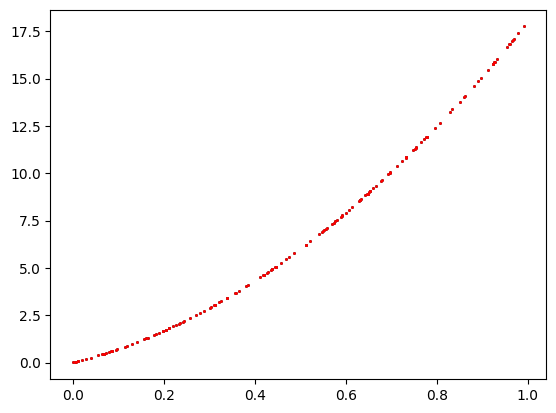

In [12]:
coeffs = (0, 6, 12)
xs = (0,1,2)
avg = []
N = 150
diff = []  # coefficient error in this experiment
x = np.random.rand(N)  # Number of random values generated between 0-1
_y = f(x, coeffs, noise = .1)
A = make_vandermonde(x)  # construct system of linear equations
a = np.linalg.pinv(A) @ _y  # solves set of linear equations
# print(np.linalg.norm(A @ a - _y) / N)  # avg error in function fit
plt.scatter(x, A @ a, c = "k", s = 1)
plt.scatter(x, _y, c = "r", s = 1)
print(a)
for i in range(3):  # calculate error for each coefficient
    diff.append(np.abs(coeffs[i] - a[i]))
# print(diff)
avg.append(np.mean(diff))  # average error per experiment
print(avg)
print(np.mean(avg))
plt.show()

Data that looks like a sine function

try fitting quadratic to that

make vandermonde can take any order approximations

In [13]:
def make_better_vandermonde(x, order: int):
    N = len(x)
    A = np.ones([N, order])  # Make a matrix with N number of rows and 3 columns
    for i in range(order):
        A[:,i] = x ** i
    # A[:,1] = x  # Second column is coefficients of x
    # A[:,2] = x ** 2
    return A

In [14]:
h = np.random.rand(100)
# make_better_vandermonde(h, 4)

In [15]:
def g(x, noise: float):
    return np.sin(np.pi * x) + np.random.randn(len(x)) * noise

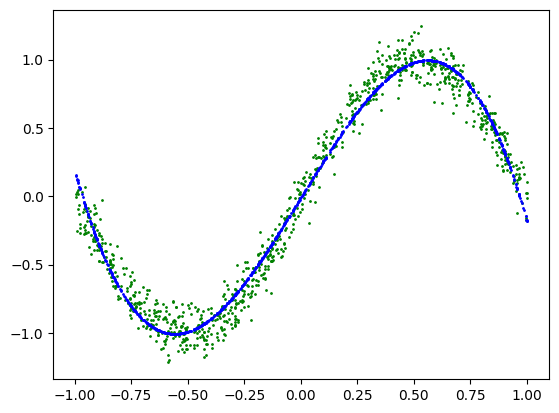

In [23]:
domain = np.linspace(0, 1, 500)
N= 1000
x = (np.random.rand(N) *2 -1) # Number of random values generated between 0-1
fig, ax = plt.subplots()
# print(domain[0])
# for i in range(len(domain)):
#     ax.scatter(domain[i], g(domain[i], 0.1), s = 0.8, c = 'k', alpha = 0.25)
y_ = f(x, (0, 0, 2),.1)
_y = g(x, .1)
# yplot = g(domain, 0)
A = make_better_vandermonde(x, 4)  # construct system of linear equations
a = np.linalg.pinv(A) @ _y  # solves set of linear equations
plt.scatter(x, _y, c = "g", s = 1)
plt.scatter(x, A @ a, c = "b", s = 1) # prediction
# plt.plot(domain, yplot, c = "r")
# ax.set_ylim(-1.3, 1.3)
# ax.set_xlim(0, 1)
plt.show()

pick a function to another function of specified order, measure error, and keep measuring as order increases to create a graph
x: order, y: error

A@a is y_pred. compute np.linalg.norm(y_pred - _y) for each order

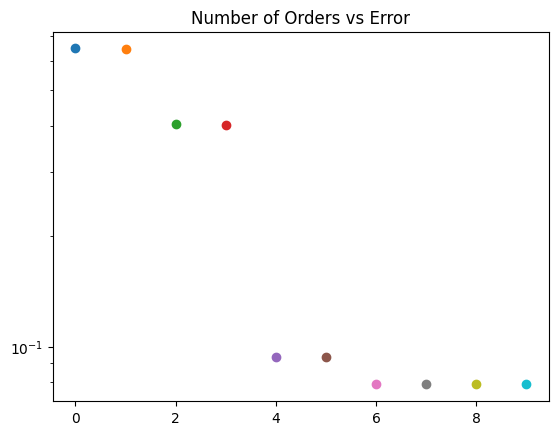

In [24]:
num_orders = 10

_y = g(x, .1)
for i in range(num_orders):
    A = make_better_vandermonde(x, i)  # construct system of linear equations
    a = np.linalg.pinv(A) @ _y
    error = np.mean(abs(_y - A @ a))
    plt.scatter(i, error)
plt.yscale("log")
plt.title("Number of Orders vs Error")
plt.show()
